이다은 / 2019312492 / 0.7278

### 초기 세팅

In [1]:
!pip install konlpy

In [2]:
import pandas as pd
from konlpy.tag import Kkma, Okt
from tqdm import tqdm
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 불러오기

In [3]:
test_data = pd.read_csv('./ttest.csv', sep=',', names=['title', 'label'])
test_data

,title,label
0,NaN,NaN
1,title,label
2,5억원 무이자 융자는 되고 7천만원 이사비는 안된다,경제
3,왜 수소충전소만 더 멀리 떨어져야 하나 한경연 규제개혁 건의,경제
4,항응고제 성분 코로나19에 효과…세포실험서 확인,IT과학
...,...,...
9104,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,경제
9105,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,사회
9106,게시판 키움증권 2020 키움 영웅전 실전투자대회,경제
9107,답변하는 배기동 국립중앙박물관장,정치


In [4]:
train_data = pd.read_csv('./ttrain.csv', sep=',', names=['title', 'label'])
train_data

,title,label
0,NaN,NaN
1,title,label
2,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학
3,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
4,내년부터 국가RD 평가 때 논문건수는 반영 않는다,IT과학
...,...,...
45675,사우디 아람코 주요 석유시설·유전 드론 공격에 화재,세계
45676,박기원 감독 눈치 보지 말고…비예나 눈치 본 건 아닌데,스포츠
45677,아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도 ...,스포츠
45678,트럼프 미중 무역협상 1단계 합의 서명식 가질 것종합,세계


현재 데이터를 보면 0, 1번째 row에 적절하지 않은 값이 들어가있는 모습을 확인할 수 있다.<br/>
따라서 0, 1번째 row를 삭제하고 index를 초기화하는 작업을 해준다.

In [5]:
# 1, 2번째 줄 제거 후 인덱스 초기화

train_data = train_data.drop([0, 1])
train_data = train_data.reset_index()
train_data = train_data.drop(columns=['index'], axis=0)

test_data = test_data.drop([0, 1])
test_data = test_data.reset_index()
test_data = test_data.drop(columns=['index'], axis=0)
test_data

,title,label
0,5억원 무이자 융자는 되고 7천만원 이사비는 안된다,경제
1,왜 수소충전소만 더 멀리 떨어져야 하나 한경연 규제개혁 건의,경제
2,항응고제 성분 코로나19에 효과…세포실험서 확인,IT과학
3,실거래가 가장 비싼 역세권은 신반포역…3.3㎡당 1억 육박,경제
4,기자회견 하는 성 소수자 단체,사회
...,...,...
9102,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,경제
9103,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,사회
9104,게시판 키움증권 2020 키움 영웅전 실전투자대회,경제
9105,답변하는 배기동 국립중앙박물관장,정치


### label 정수 인코딩

분류의 편리성을 위해 label을 정수로 바꾸어 다시 저장한다.

In [6]:
# 중복 제거 후 distinct 값 확인
temp_data = train_data
result = temp_data['label'].drop_duplicates()
print(type(result))
result

<class 'pandas.core.series.Series'>


0     IT과학
1     생활문화
6      스포츠
7       사회
8       세계
11      정치
31      경제
Name: label, dtype: object

이렇게 분류 해야 할 토픽은 총 7개이며, <br/>`IT과학`, `생활문화`, `스포츠`, `사회`, `세계`, `정치`, `경제`라는 것을 알게 되었다.

In [7]:
# null 값이 있는지 확인
train_data.isnull().values.any()

False

Null 값이 있는지도 확인해봤지만, 없는 것을 알 수 있다.

토픽을 정수로 인코딩한다.

In [8]:
topic_list = ['IT과학', '생활문화', '스포츠', '사회', '세계', '정치', '경제']

for i in range(len(train_data)):
  train_data.loc[i, 'label'] = topic_list.index(train_data.iloc[i, 1]) 

for i in range(len(test_data)):
  test_data.loc[i, 'label'] = topic_list.index(test_data.iloc[i, 1]) 
  
test_data

,title,label
0,5억원 무이자 융자는 되고 7천만원 이사비는 안된다,6
1,왜 수소충전소만 더 멀리 떨어져야 하나 한경연 규제개혁 건의,6
2,항응고제 성분 코로나19에 효과…세포실험서 확인,0
3,실거래가 가장 비싼 역세권은 신반포역…3.3㎡당 1억 육박,6
4,기자회견 하는 성 소수자 단체,3
...,...,...
9102,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,6
9103,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,3
9104,게시판 키움증권 2020 키움 영웅전 실전투자대회,6
9105,답변하는 배기동 국립중앙박물관장,5


### 데이터 정제

데이터셋을 활용해보니 2020, 7천만원, '…' 등 토픽과는 크게 관련이 없는 숫자, 구둣점들이 있다. <br/>
제거해주었다.

In [9]:
# 숫자, 구둣점 제거 -> 공백으로 대체
train_data['title'] = train_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]"," ")
test_data['title'] = test_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]"," ")

In [10]:
train_text = []
test_text = []

okt = Okt()
for text in tqdm(train_data['title']):
  temp = okt.morphs(text, stem=True)
  # no_stopwords_ver = [word for word in temp if not word in stopwords] # 스탑워드 제거
  # train_text.append(no_stopwords_ver)
  train_text.append(temp)
for text in tqdm(test_data['title']):
  temp = okt.morphs(text, stem=True)
  # no_stopwords_ver = [word for word in temp if not word in stopwords]
  # test_text.append(no_stopwords_ver)
  test_text.append(temp)
train_label = train_data['label']
test_label = test_data['label']

100%|██████████| 9107/9107 [00:11<00:00, 782.63it/s]


### 데이터셋 확인

뉴스 제목의 최대 길이 :18
뉴스 제목의 평균 길이 :9.726936380752223


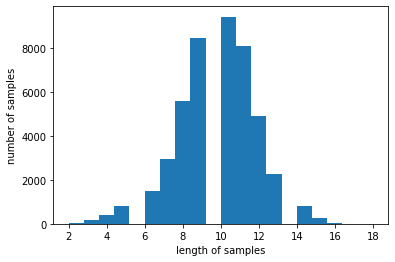

In [11]:
print('뉴스 제목의 최대 길이 :{}'.format(max(len(l) for l in train_text)))
print('뉴스 제목의 평균 길이 :{}'.format(sum(map(len, train_text))/len(train_text)))

plt.hist([len(s) for s in train_text], bins=20)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


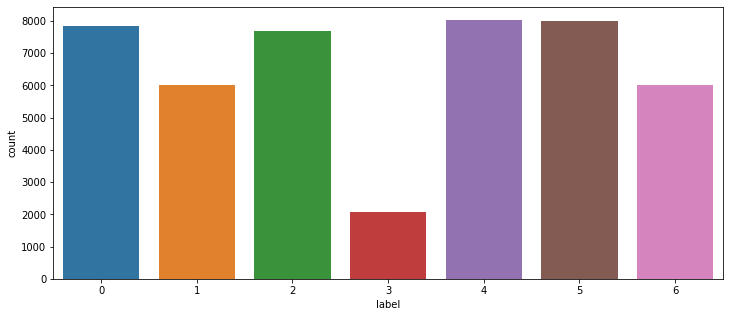

In [12]:
# 토픽의 분포
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(train_label)

### 정수 인코딩

In [13]:
# 정수 인코딩

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_text)

In [14]:
tokenizer.word_index

{'에': 1,
 '종합': 2,
 '하다': 3,
 '의': 4,
 '서': 5,
 '로': 6,
 '일': 7,
 '대통령': 8,
 '한': 9,
 '도': 10,
 '이': 11,
 '은': 12,
 '년': 13,
 '명': 14,
 '한국': 15,
 '과': 16,
 '으로': 17,
 '는': 18,
 '들': 19,
 '위': 20,
 '가': 21,
 '전': 22,
 '첫': 23,
 '만': 24,
 '월': 25,
 '삼성': 26,
 '이란': 27,
 '적': 28,
 '보': 29,
 '억원': 30,
 '당': 31,
 'g': 32,
 '되다': 33,
 '와': 34,
 '등': 35,
 '감독': 36,
 '출시': 37,
 '경기': 38,
 '트럼프': 39,
 '중': 40,
 'lg': 41,
 '만에': 42,
 'kt': 43,
 '것': 44,
 '천': 45,
 '없다': 46,
 '게시판': 47,
 '주': 48,
 '에서': 49,
 '문': 50,
 '보다': 51,
 '장': 52,
 '회': 53,
 '대': 54,
 '까지': 55,
 '개': 56,
 '신간': 57,
 '제': 58,
 '안': 59,
 '분기': 60,
 '정부': 61,
 'sk': 62,
 '투자': 63,
 '시': 64,
 '부터': 65,
 '최고': 66,
 '원': 67,
 '기': 68,
 '중국': 69,
 '을': 70,
 '개발': 71,
 '자': 72,
 '더': 73,
 '개최': 74,
 '대다': 75,
 '지': 76,
 '서울': 77,
 '화': 78,
 '미국': 79,
 '올해': 80,
 '세계': 81,
 '공개': 82,
 '최': 83,
 '현대': 84,
 '내': 85,
 '영업': 86,
 '조': 87,
 's': 88,
 '총리': 89,
 '게임': 90,
 '차': 91,
 '사': 92,
 '기술': 93,
 '고': 94,
 '시장': 95,
 '민주': 96,
 '

In [15]:
print(train_text[1000])
print(train_text[2000])
print(train_text[3000])

['해남군', '전국', '최초', '농민', '수당', '지급', '만', '천명', '에', '만원', '씩']
['거래소', '고속도로', '주유소', '석유', '시장', '참여', 'MOU']
['비', '그', '치자', '다시', '찜통', '더위', '울산', '대구', '부산', '강릉', '폭염', '경보']


In [18]:
tokenizer = Tokenizer(len(tokenizer.word_index))
tokenizer.fit_on_texts(train_text)
train_text = tokenizer.texts_to_sequences(train_text)
test_text = tokenizer.texts_to_sequences(test_text)

In [19]:
print(train_text[1000])
print(train_text[2000])
print(train_text[3000])

[17229, 148, 562, 6606, 4653, 2466, 24, 793, 1, 226, 2477]
[1067, 2621, 13623, 1091, 95, 505, 1017]
[98, 497, 13777, 363, 2568, 991, 668, 512, 231, 1693, 552, 1326]


In [20]:
train_label

0        0
1        1
2        0
3        0
4        1
        ..
45673    4
45674    2
45675    2
45676    4
45677    2
Name: label, Length: 45678, dtype: object

### LSTM

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [22]:
max_len = 18
train_text = pad_sequences(train_text, maxlen=max_len)
test_text = pad_sequences(test_text, maxlen=max_len)

In [23]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [29]:
vocab_size = len(tokenizer.word_index)
embedding_dim = 128
hidden_units = 128
num_classes = 7

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [32]:
history = model.fit(train_text, np.asarray(train_label), batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(test_text, np.asarray(test_label)))

Epoch 1/30
357/357 [==============================] - ETA: 0s - loss: 0.6886 - acc: 0.7695
Epoch 00001: val_acc improved from -inf to 0.64829, saving model to best_model.h5
357/357 [==============================] - 10s 20ms/step - loss: 0.6886 - acc: 0.7695 - val_loss: 0.9516 - val_acc: 0.6483
Epoch 2/30
354/357 [============================>.] - ETA: 0s - loss: 0.1994 - acc: 0.9405
Epoch 00002: val_acc improved from 0.64829 to 0.70122, saving model to best_model.h5
357/357 [==============================] - 5s 13ms/step - loss: 0.1990 - acc: 0.9405 - val_loss: 0.9988 - val_acc: 0.7012
Epoch 3/30
356/357 [============================>.] - ETA: 0s - loss: 0.0914 - acc: 0.9729
Epoch 00003: val_acc did not improve from 0.70122
357/357 [==============================] - 5s 13ms/step - loss: 0.0915 - acc: 0.9728 - val_loss: 1.0963 - val_acc: 0.6942
Epoch 4/30
354/357 [============================>.] - ETA: 0s - loss: 0.0471 - acc: 0.9862
Epoch 00004: val_acc improved from 0.70122 to 0.7277

In [33]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(test_text, test_label)[1]))

285/285 [==============================] - 2s 5ms/step - loss: 1.0007 - acc: 0.7278

 테스트 정확도: 0.7278
